<a href="https://colab.research.google.com/github/jasmeen2105/Jasmeen/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')



In [97]:
!pip install kaggle

In [98]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog


cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [99]:
import zipfile

# Unzip the file
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/cat-and-dog/') # Extract to a new directory

# Update data_path to the extracted directory
data_path = '/content/cat-and-dog'

In [100]:
# Define ImageDataGenerator for data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [101]:
# Load train and validation datasets
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [102]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [103]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 75s 295ms/step - accuracy: 0.7895 - loss: 0.5766 - val_accuracy: 0.7974 - val_loss: 0.5084
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8750 - loss: 0.3871 - val_accuracy: 0.8004 - val_loss: 0.5032
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 72s 287ms/step - accuracy: 0.8067 - loss: 0.4976 - val_accuracy: 0.7974 - val_loss: 0.5049
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.7500 - loss: 0.5641 - val_accuracy: 0.7989 - val_loss: 0.5026
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 369ms/step - accuracy: 0.7978 - loss: 0.5079 - val_accuracy: 0.7979 - val_loss: 0.5040


In [105]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    return 'Dog' if prediction > 0.5 else 'Cat'

In [106]:
# Test with an image
img_path = '/content/cat-and-dog/test_set/test_set/cats/cat.4012.jpg' # Update this path
result = predict_image(img_path)
print(f'Predicted Class: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Class: Dog


In [107]:
history.history['accuracy']

[0.7961456775665283, 0.875, 0.7983981966972351, 0.75, 0.7981479167938232]

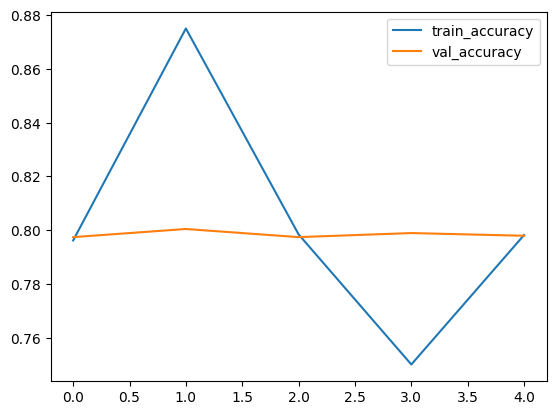

In [108]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
